# Compile the PELIC and ASAG Datasets

The datasets have already been cleaned and balanced.

In [51]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Load the balanced datasets
pelic = pd.read_csv('../data/PELIC_balanced.csv').drop(['Unnamed: 0'],axis=1)
asag = pd.read_csv('../data/ASAG_balanced.csv').drop(['Unnamed: 0'],axis=1)

In [67]:
pelic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6792 entries, 0 to 6791
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   answer_id         6792 non-null   int64  
 1   question_id       6792 non-null   int64  
 2   anon_id           6792 non-null   object 
 3   course_id         6792 non-null   int64  
 4   created_date      6792 non-null   object 
 5   text_len          6792 non-null   int64  
 6   answer            6775 non-null   object 
 7   tokens            6792 non-null   object 
 8   tok_lem_POS       6792 non-null   object 
 9   question_type_id  6792 non-null   float64
 10  question          6792 non-null   object 
 11  allow_text        6792 non-null   float64
 12  gender            6792 non-null   object 
 13  L1                6792 non-null   object 
 14  class_id          6792 non-null   object 
 15  level             6792 non-null   int64  
 16  question_type     6792 non-null   object 


In [68]:
asag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        224 non-null    object 
 1   age_participant  224 non-null    int64  
 2   sex_participant  224 non-null    object 
 3   education        224 non-null    object 
 4   L1               224 non-null    object 
 5   sex_examiner1    224 non-null    object 
 6   sex_examiner2    224 non-null    object 
 7   sex_examiner3    224 non-null    object 
 8   setting          224 non-null    object 
 9   question         224 non-null    object 
 10  word_limit       224 non-null    object 
 11  level_course     224 non-null    int64  
 12  answer           224 non-null    object 
 13  grade_examiner1  224 non-null    int64  
 14  grade_examiner2  222 non-null    float64
 15  grade_examiner3  224 non-null    int64  
 16  level            224 non-null    int64  
 17  question_type   

In [69]:
# Merge the pelic and asag dataframes
columns_to_merge = ['level','L1','question_type','question','answer','dataset','is_augmented']
pelic_trimmed = pelic[columns_to_merge]
asag_trimmed = asag[columns_to_merge]
df = pd.concat([pelic_trimmed,asag_trimmed]).reset_index(drop=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7016 entries, 0 to 7015
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   level          7016 non-null   int64 
 1   L1             7016 non-null   object
 2   question_type  7016 non-null   object
 3   question       7016 non-null   object
 4   answer         6999 non-null   object
 5   dataset        7016 non-null   object
 6   is_augmented   7016 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 383.8+ KB


In [71]:
# Identify rows with null values in the 'answer' column
null_answers = df[df['answer'].isnull()]

# Display the rows with null values in the 'answer' column
print(null_answers)

      level       L1 question_type  \
893       2   Korean  Short answer   
926       2   Arabic  Short answer   
954       2  Italian  Short answer   
976       2   Arabic  Short answer   
977       2   Arabic  Short answer   
988       2   Arabic  Short answer   
989       2   Arabic  Short answer   
1025      2  Chinese  Short answer   
1058      2   Arabic  Short answer   
1232      2   Arabic  Short answer   
1235      2   Arabic  Short answer   
1365      2   Arabic  Short answer   
1383      2   Arabic  Short answer   
1391      2   Arabic  Short answer   
1458      2  English  Short answer   
1503      2  English  Short answer   
1505      2  English  Short answer   

                                               question answer dataset  \
893   Answer the question.  Write a complete sentenc...    NaN   PELIC   
926                    Where do you live in Pittsburgh?    NaN   PELIC   
954        Was Lily happy or unhapppy on Oct. 27?  Why?    NaN   PELIC   
976   "Why Do It?" 

In [72]:
df = df.dropna()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7015
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   level          6999 non-null   int64 
 1   L1             6999 non-null   object
 2   question_type  6999 non-null   object
 3   question       6999 non-null   object
 4   answer         6999 non-null   object
 5   dataset        6999 non-null   object
 6   is_augmented   6999 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 437.4+ KB


In [74]:
df.level.value_counts()

level
3    1754
4    1754
5    1754
2    1737
Name: count, dtype: int64

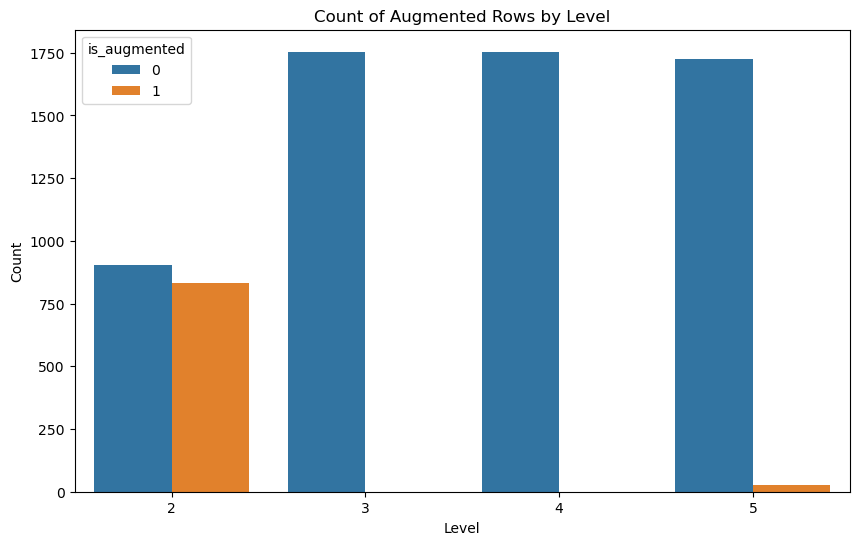

In [75]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='level', hue='is_augmented')

# Add labels and title
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Count of Augmented Rows by Level')

# Display the plot
plt.show()

In [76]:
df.L1.value_counts()

L1
Arabic               1811
Chinese              1638
Korean               1500
Italian               699
Spanish               273
French                262
Japanese              201
Thai                  121
Turkish               113
Vietnamese             72
Other                  53
Taiwanese              47
Portuguese             40
Mongol                 39
English                38
Russian                31
Indonesian             12
Azerbaijani            11
Suundi                 10
German                  9
Hebrew                  9
Polish                  3
Russian,Ukrainian       2
Montenegrin             1
Hindi                   1
Swahili                 1
Kabyle                  1
Dutch                   1
Name: count, dtype: int64

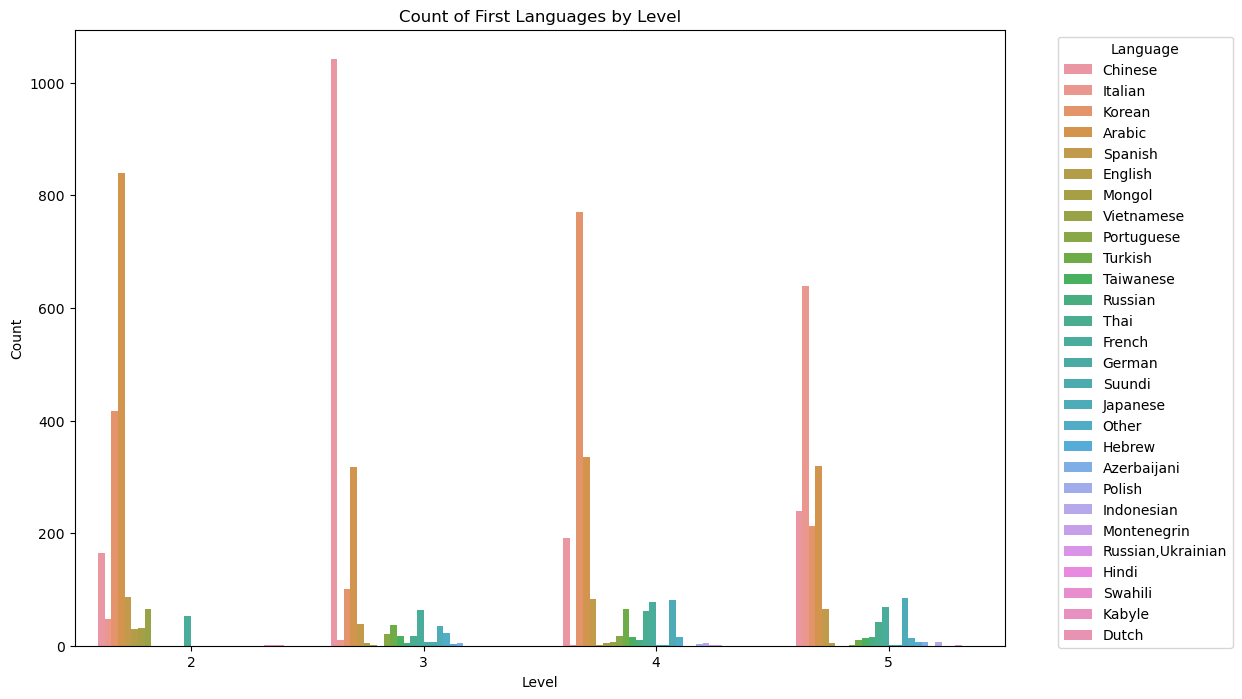

In [77]:
# Create a count plot
plt.figure(figsize=(12, 8))
count_plot = sns.countplot(data=df, x='level', hue='L1')

# Move the legend outside the plot
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels and title
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Count of First Languages by Level')

# Display the plot
plt.show()

In [78]:
df.to_csv('../data/PELIC_ASAG_balanced.csv')